In [1]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d kenjee/z-by-hp-unlocked-challenge-3-signal-processing

z-by-hp-unlocked-challenge-3-signal-processing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#!unzip z-by-hp-unlocked-challenge-3-signal-processing

Archive:  z-by-hp-unlocked-challenge-3-signal-processing.zip
replace Forest Recordings/recording_00.mp3? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!pip install tensorflow_io==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import os
from matplotlib import pyplot as plt 
import tensorflow as tf
import tensorflow_io as tfio

In [8]:
CAPUCHIN_FILE = os.path.join('Parsed_Capuchinbird_Clips','XC114131-0.wav')
NOT_CAPUCHIN_FILE = os.path.join('Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-1.wav')

In [9]:
NOT_CAPUCHIN_FILE

'Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-1.wav'

In [10]:
def load_wav_16k_mono(filename):
  file_contents = tf.io.read_file(filename)
  wav ,sample_rate = tf.audio.decode_wav(file_contents,desired_channels=1)
  wav = tf.squeeze(wav,axis = -1)
  sample_rate = tf.cast(sample_rate, dtype = tf.int64)
  wav = tfio.audio.resample(wav,rate_in = sample_rate, rate_out= 16000)
  return wav

In [11]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

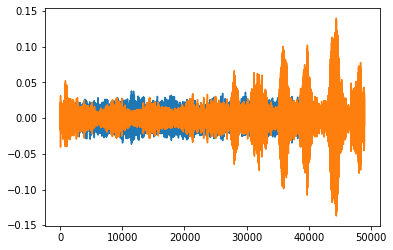

In [12]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [13]:
POS = os.path.join( 'Parsed_Capuchinbird_Clips')
NEG = os.path.join( 'Parsed_Not_Capuchinbird_Clips')

In [14]:
os.listdir(POS)

['XC178167-3.wav',
 'XC433953-3.wav',
 'XC600460-4.wav',
 'XC388470-3.wav',
 'XC27882-0.wav',
 'XC79965-2.wav',
 'XC65196-3.wav',
 'XC216012-7.wav',
 'XC114131-2.wav',
 'XC574020-0.wav',
 'XC456236-1.wav',
 'XC456236-0.wav',
 'XC216010-2.wav',
 'XC216012-18.wav',
 'XC3776-0.wav',
 'XC27881-0.wav',
 'XC216010-1.wav',
 'XC79965-4.wav',
 'XC178167-2.wav',
 'XC79965-3.wav',
 'XC495697-3.wav',
 'XC216012-13.wav',
 'XC526106-2.wav',
 'XC433953-8.wav',
 'XC79965-5.wav',
 'XC387509-0.wav',
 'XC46241-4.wav',
 'XC114132-2.wav',
 'XC22397-3.wav',
 'XC9221-2.wav',
 'XC456236-3.wav',
 'XC46077-2.wav',
 'XC227471-1.wav',
 'XC27882-2.wav',
 'XC227471-2.wav',
 'XC27882-4.wav',
 'XC114131-0.wav',
 'XC227468-1.wav',
 'XC216010-6.wav',
 'XC114132-6.wav',
 'XC526106-4.wav',
 'XC526106-5.wav',
 'XC27882-6.wav',
 'XC9221-0.wav',
 'XC600460-1.wav',
 'XC27881-3.wav',
 'XC178168-0.wav',
 'XC388470-4.wav',
 'XC574021-0.wav',
 'XC65196-0.wav',
 'XC27882-3.wav',
 'XC387509-2.wav',
 'XC178168-2.wav',
 'XC79965-1.w

In [15]:
pos = tf.data.Dataset.list_files(os.path.join(POS,'*.wav')) 
neg = tf.data.Dataset.list_files(os.path.join(NEG,'*.wav'))

In [16]:
pos.as_numpy_iterator().next()

b'Parsed_Capuchinbird_Clips/XC46241-1.wav'

In [17]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

In [18]:
data = positives.concatenate(negatives)

In [19]:
length = []

for file in os.listdir(os.path.join('Parsed_Capuchinbird_Clips')):
  target_wave = load_wav_16k_mono(os.path.join('Parsed_Capuchinbird_Clips',file))
  length.append(len(target_wave))

In [20]:
length

[56000,
 48000,
 56000,
 32000,
 64000,
 72000,
 56000,
 56000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 64000,
 56000,
 64000,
 56000,
 80000,
 56000,
 40000,
 56000,
 32000,
 56000,
 56000,
 56000,
 64000,
 72000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 64000,
 40000,
 64000,
 48000,
 56000,
 48000,
 56000,
 48000,
 64000,
 48000,
 40000,
 48000,
 48000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 40000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 56000,
 56000,
 64000,
 56000,
 40000,
 64000,
 32000,
 56000,
 56000,
 48000,
 48000,
 48000,
 48000,
 40000,
 40000,
 40000,
 56000,
 56000,
 56000,
 72000,
 56000,
 64000,
 48000,
 40000,
 40000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 64000,
 72000,
 56000,
 64000,
 40000,
 40000,
 56000,
 64000,
 64000,
 64000,
 64000,
 48000,
 56000,
 48000,
 48000,
 55999,
 56000,
 56000,
 48000,
 64000,
 56000,
 48000,
 48000,
 56000,
 48000,
 64000,
 56000,
 64000,
 48000,


In [21]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [22]:
file_path, label = positives.shuffle(buffer_size = 10000).as_numpy_iterator().next()

In [23]:
spectrogram, label = preprocess(file_path, label)

In [24]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[4.8071221e-03],
        [2.3891477e-02],
        [7.6735668e-02],
        ...,
        [3.3841869e-03],
        [1.6591244e-03],
        [6.3799322e-05]],

       [[2.3225993e-03],
        [2.8888255e-02],
        [6.4690299e-02],
        ...,
        [2.8961264e-03],
        [2.5824716e-03],
        [3.6175549e-04]],

       [[1.6922444e-02],
        [2.4511665e-02],
        [3.9401546e-02],
        ...,
        [3.6615420

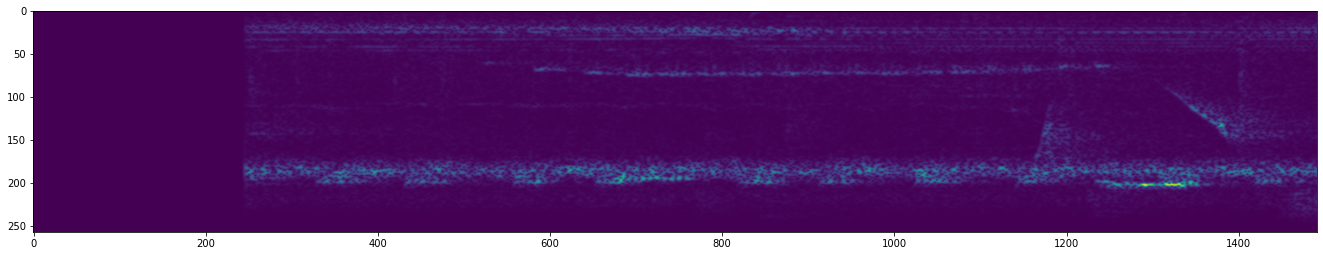

In [25]:
plt.figure(figsize = (23,30))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [26]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size= 10000)
data = data.batch(16)
data = data.prefetch(8)

In [27]:
train = data.take(36)
test = data.skip(36).skip(15)

In [28]:
samples, labels = data.as_numpy_iterator().next()

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (1491,257,1)),
    tf.keras.layers.Conv2D(16,33),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(
    loss = 'BinaryCrossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.Recall(),tf.keras.metrics.Precision()]
)

In [ ]:
hist = model.fit(train, epochs = 4, validation_data= test)

Epoch 1/4
